## Quadratic Regression Analysis
### Author: OuroborosRex
This script performs quadratic regression analysis on financial data using the Statsmodels library in Python. It fits a quadratic curve to the data and predicts future values based on the curve.

### Prerequisites

- Python 3.x
- pandas
- statsmodels
- matplotlib
- scipy

### Installation

1. Clone the repository or download the script file.
2. Install the required libraries by running the following command:
   ```
   pip install pandas statsmodels matplotlib scipy
   ```

### Usage

1. Prepare the data:
   - Ensure the financial data is in a CSV file.
   - Update the file path in the `data = pd.read_csv(...)` line to point to your CSV file.

2. Customize the regression analysis:
   - Modify the `quadratic_func` function if you want to fit a different quadratic equation.
   - Adjust the window size in the `calculate_rolling_average` function for calculating the rolling average.
   - Uncomment the necessary plotting code if you want to visualize the data and regression curves.

3. Run the script:
   ```
   python script.py
   ```
   or
   - Run the Jupyter code blocks.

4. Interpret the results:
   - The script performs quadratic regression on the financial data and calculates the directional accuracy and directional short accuracy.
   - The directional accuracy represents the percentage of successful directional predictions based on the regression curves.
   - The directional short accuracy represents the percentage of successful short-term directional predictions based on the regression curves and rolling averages. The short term is half of the window of the normal directional accuracy (e.g. 40 -> 20).

### Notes

- This script assumes that the financial data is organized in a specific format and requires customization based on your data structure.
- Adjustments and modifications may be necessary to fit the script to your specific use case.

Please make sure to customize the script according to your data and requirements before running it.

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import warnings
warnings.filterwarnings("ignore")

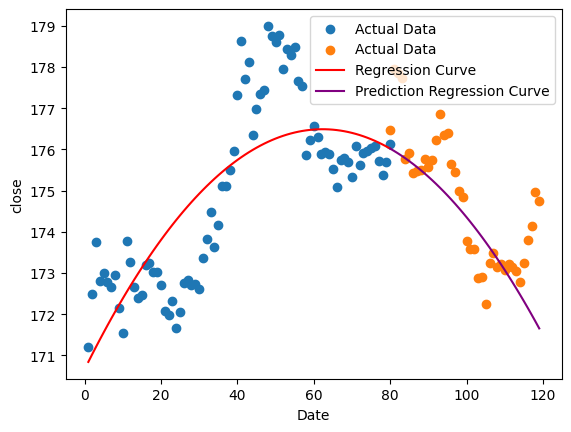

In [44]:

# Quadratic function
def quadratic_func(x, a, b, c):
    return a * x**2 + b * x + c

def calculate_rolling_average(data):
    window_size = 5
    rolling_average = np.convolve(data, np.ones(window_size), 'valid') / window_size
    return rolling_average

def main():
    data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Data/BYBIT_SOLUSDT.P, 30_44b94.csv')
    df_0 = pd.DataFrame(data)

    df = df_0[0:80]
    df['Intercept'] = 1

    X = np.arange(1, len(df) + 1)
    y = list(df['close'])

    params, _ = curve_fit(quadratic_func, X, y)
    y_pred = quadratic_func(X, *params)
    forecast = quadratic_func(np.arange(80, 120), *params)

    # This will plot each forecast
    plt.scatter(X, y, label='Actual Data')
    plt.scatter(np.arange(80,120), df_0['close'][80:120], label='Actual Data')
    plt.plot(X, y_pred, color='red', label='Regression Curve')
    plt.plot(np.arange(80,120), forecast, color='purple', label='Prediction Regression Curve')
    plt.xlabel('Date')
    plt.ylabel('close')
    plt.legend()
    plt.show()

    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    results = model.fit()
    model_std_err = results.bse[1]
    actual_std_err = np.std(y) / np.sqrt(len(y))

if __name__ == '__main__':
    main()


In [40]:

# Quadratic function
def quadratic_func(x, a, b, c):
    return a * x**2 + b * x + c

def calculate_rolling_average(data):
    window_size = 5
    rolling_average = np.convolve(data, np.ones(window_size), 'valid') / window_size
    return rolling_average

def main():
    data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Data/BYBIT_SOLUSDT.P, 30_44b94.csv')
    df_0 = pd.DataFrame(data)
    # print(df_0.head())
    num = 0
    win_count = 0
    short_win_count = 0

    for i in range(len(df_0)//80):
        df = df_0[i*80:(i+1)*80]
        df['Intercept'] = 1

        X = np.arange(1, len(df) + 1) # Independent variables
        # print(X)
        y = list(df['close']) # Dependent variable

        params, _ = curve_fit(quadratic_func, X, y)
        y_pred = quadratic_func(X, *params)
        forecast = quadratic_func(np.arange(80, 120), *params)

        # This will plot each forecast

        # plt.scatter(X, y, label='Actual Data')
        # plt.scatter(np.arange(80,120), df_0['close'][(i+1)*80:(i+1)*80+40], label='Actual Data')
        # plt.plot(X, y_pred, color='red', label='Regression Curve')
        # plt.plot(np.arange(80,120), forecast, color='purple', label='Prediction Regression Curve')
        # plt.xlabel('Date')
        # plt.ylabel('close')
        # plt.legend()
        # plt.show()

        X = sm.add_constant(X)
        model = sm.OLS(y, X)
        results = model.fit()
        model_std_err = results.bse[1]
        actual_std_err = np.std(y) / np.sqrt(len(y))

        real_val = list(df_0['close'][(i+1)*80:(i+1)*80+40])
        rolling_average = calculate_rolling_average(real_val)

        num += 1

        if forecast[0] > forecast[-1]:
            if rolling_average[0] > rolling_average[-1]:
                win_count += 1
            if(rolling_average[0] > rolling_average[len(rolling_average)//2]):
                short_win_count+=1

        if forecast[0] < forecast[-1]:
            if rolling_average[0] < rolling_average[-1]:
                win_count += 1
            if(rolling_average[0] > rolling_average[len(rolling_average)//2]):
                short_win_count+=1

    # print('DONE!')
    print('Directional Accuracy: %.1f%%' % (win_count / num * 100))
    print('Directional Short Accuracy: %.1f%%' % (short_win_count / num * 100))

if __name__ == '__main__':
    main()

Directional Accuracy: 47.1%
Directional Short Accuracy: 58.3%
